## Import packages and classes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import statsmodels.api as sm

## Load dataset

In [8]:
data_raw = pd.read_csv('./../../../Datasets/Greece - Agriculture and Rural Development/agriculture-and-rural-development_grc.csv', usecols=None)
pd.set_option('display.max_columns', 10)
data_raw.head()

,Agricultural land (% of land area),Agricultural land (sq. km),"Agricultural machinery, tractors","Agricultural machinery, tractors per 100 sq. km of arable land",Agricultural raw materials exports (% of merchandise exports),...,Permanent cropland (% of land area),Rural population,Rural population (% of total population),Rural population growth (annual %),Surface area (sq. km)
0,NaN,NaN,NaN,NaN,NaN,...,NaN,3671291,44.064,NaN,NaN
1,69.123351,89100.0,22630.0,80.994989,NaN,...,7.028704,3657099,43.547,-0.387316,131960.0
2,69.061288,89020.0,24530.0,85.679357,23.071856,...,6.508922,3604016,42.660,-1.462143,131960.0
3,69.984484,90210.0,28500.0,93.228656,16.425263,...,6.508922,3542618,41.778,-1.718278,131960.0
4,69.751746,89910.0,33500.0,111.629457,16.315466,...,6.570985,3480851,40.901,-1.758920,131960.0


## Select variables & Drop NaN values

In [6]:
variable_x = "Crop production index (2014-2016 = 100)"
variable_y = "Cereal production (metric tons)"
data = data_raw[[variable_x, variable_y]].dropna().reset_index(drop=True)
data.head()

,Crop production index (2014-2016 = 100),Cereal production (metric tons)
0,62.570000,2243876.0
1,50.700001,2426843.0
2,57.430000,2122537.0
3,57.150002,2874641.0
4,61.770000,2940922.0


In [7]:
data.shape

(58, 2)

## Train-test split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(data[variable_x].to_numpy(), data[variable_y].to_numpy(), test_size=0.2, random_state=42)

## Sklean Linear Regression

In [9]:
model = LinearRegression().fit(X_train.reshape(-1, 1), y_train)

In [10]:
print(f"Intercept: {model.intercept_}")
print(f"Slope: {model.coef_}")

Intercept: -338797.33066389244
Slope: [51647.36492435]


## Prediction

In [11]:
y_pred = np.around(model.predict(X_test.reshape(-1, 1)), 1)
y_pred

array([2892778.3, 2960952.8, 5072813.5, 3795574.4, 5177141.4, 4196357.7,
       4998957.8, 4700952.6, 4551691.8, 3424746.3, 4813543.9, 2612849.7])

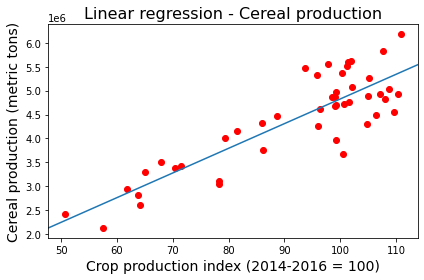

In [12]:
fig, ax = plt.subplots()
plt.scatter(X_train, y_train, color='red')
ax.axline((X_test[1], y_pred[1]), slope=model.coef_[0])

plt.title('Linear regression - Cereal production', fontsize=16)
plt.xlabel(variable_x, fontsize=14)
plt.ylabel(variable_y, fontsize=14)

plt.tight_layout()
plt.show()

## Evaluation

In [13]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 300467.2
Mean Squared Error: 142457458025.50165
Root Mean Squared Error: 377435.36933560116


In [14]:
print("R-Square value:", metrics.r2_score(y_test, y_pred))

R-Square value: 0.8563623217388497


In [15]:
X_stat = sm.add_constant(X_train)
regsummary = sm.OLS(y_train, X_stat).fit()
regsummary.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     127.6
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           1.36e-14
Time:                        15:13:51   Log-Likelihood:                -668.16
No. Observations:                  46   AIC:                             1340.
Df Residuals:                      44   BIC:                             1344.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.388e+05   4.26e+05     -0.796      0.430    -1.2e+06    5.19e+05
x1          5.165e+04   4571.889     11.297      0.000    4.24e+04    6.09e+04
==============================================================================
Omnibus:                        0.370   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.831   Jarque-Bera (JB):                0.538
Skew:                          -0.082   Prob(JB):                        0.764
Kurtosis:                       2.496   Cond. No.                         534.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

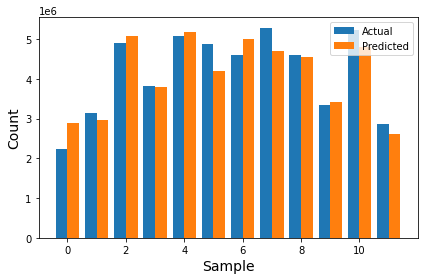

In [16]:
fig, ax = plt.subplots()
x_axis = np.arange(12)

plt.bar(x_axis-0.2, y_test, width=0.4, label = "Actual")
plt.bar(x_axis+0.2, y_pred, width=0.4, label = "Predicted")

plt.xlabel("Sample", fontsize=14)
plt.ylabel("Count", fontsize=14)

plt.legend()

plt.tight_layout()
plt.show()

## Linear Regression by Hand

In [26]:
def linear_regression_coef(x, y):
    
    assert np.size(x) == np.size(y)
    
    # number of observations
    n = np.size(x)
  
    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)
  
    # calculating regression coefficients
    b_1 = (np.sum(y*x) - n*m_y*m_x) / (np.sum(x*x) - n*m_x*m_x)
    b_0 = m_y - b_1*m_x
  
    return (b_0, b_1)

In [27]:
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12])
res = linear_regression_coef(x,y)  
res

(1.2363636363636363, 1.1696969696969697)